In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [5]:
credit_card = pd.read_csv('creditcard.csv')
credit_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
X = credit_card.drop('Class', axis = 1)
Y = credit_card['Class']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.67      0.73      0.70       143

    accuracy                           1.00     85443
   macro avg       0.83      0.87      0.85     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

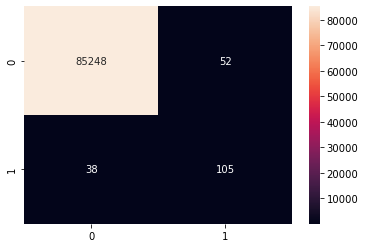

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 80)
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(classification_report(y_test, pred))
confu = confusion_matrix(y_test, pred)
sns.heatmap(confu, annot = True, fmt = 'd')

In [14]:
Fraud_amount = credit_card['Amount'][credit_card['Class']==1]
print('Maximum Fraud amount:', Fraud_amount.max())
print('Minimum Fraud amount:', Fraud_amount.min())

Maximum Fraud amount: 2125.87
Minimum Fraud amount: 0.0
